# Tiền xử lí (full script)
#### <span style="color: gold;"> Thầy/cô chỉ cần chạy cell này</span>

In [2]:
# Tiền xử lí và lưu dữ liệu đã xử lí vào /data/processed_data_4/9_classes.csv
import pandas as pd

import os 
BASE_DIR = os.path.dirname(
    os.path.dirname(
        os.path.dirname(
            os.path.abspath('notebook/preprocessing.ipynb'))))

path18 = os.path.join(BASE_DIR, 'data\\raw\\ground_water_quality_2018_post.csv')
path19 = os.path.join(BASE_DIR, 'data\\raw\\ground_water_quality_2019_post.csv')
path20 = os.path.join(BASE_DIR, 'data\\raw\\ground_water_quality_2020_post.csv')

df_18 = pd.read_csv(path18)
df_19 = pd.read_csv(path19)
df_20 = pd.read_csv(path20)
print('✅ Dữ liệu đã được tải thành công!')

df_19.rename(columns={'EC': 'E.C', 'CO_-2 ': 'CO3', 'HCO_ - ': 'HCO3', 'Cl -': 'Cl', 'F -': 'F', 'NO3- ': 'NO3', 'SO4-2': 'SO4', 'Na+': 'Na', 'K+': 'K', 'Ca+2': 'Ca', 'Mg+2': 'Mg'}, inplace=True)
df_18.rename(columns={'NO3 ': 'NO3'}, inplace=True)
df_20.rename(columns={'NO3 ': 'NO3'}, inplace=True)
print('✅ Chuẩn hóa tên cột thành công!')

df_20 = pd.concat(
    [df_20.iloc[:, :23], 
     df_20['Classification'].replace('O.G', 'OG'), 
     df_20.iloc[:, 24:]
    ], 
    axis=1)
print('✅ Chuẩn hóa giá trị trong cột Classification thành công!')

df = pd.concat([df_18, df_19, df_20], ignore_index=True)
df = df.drop(columns=['CO3', 'E.C', 'sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'season', 'RSC  meq  / L', 'Classification.1']).copy()
print('✅ Xóa các cột không liên quan thành công!')

gwl_mean = df['gwl'].mean()
df.fillna({'gwl': gwl_mean}, inplace=True)
print('✅ Fill giá trị null trong cột gwl bằng mean!')

df_4_classes = df[df['Classification'].isin(['C4S2', 'C4S1', 'C3S1', 'C2S1'])].copy()
df_9_classes = df[~df['Classification'].isin(['C3S4', 'C2S2', 'C1S1'])].copy()
print('✅ Tách dữ liệu thành 2 loại: 4 classes và 9 classes!')

df_4_classes.to_csv(os.path.join(BASE_DIR, 'data/processed_data_4_classes.csv'), index=False)
df_9_classes.to_csv(os.path.join(BASE_DIR, 'data/processed_data_9_classes.csv'), index=False)
print('✅ Lưu dữ liệu đã xử lí!')

✅ Dữ liệu đã được tải thành công!
✅ Chuẩn hóa tên cột thành công!
✅ Chuẩn hóa giá trị trong cột Classification thành công!
✅ Xóa các cột không liên quan thành công!
✅ Fill giá trị null trong cột gwl bằng mean!
✅ Tách dữ liệu thành 2 loại: 4 classes và 9 classes!
✅ Lưu dữ liệu đã xử lí!


# Các thử nghiệm

#### <span style="color: gold;"> Phần này đưa ra các kết quả đã thử nghiệm, dựa vào đây mới đưa ra quyết định thực hiện chu trình tiền xử lí như trên</span>

Đọc dữ liệu

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os 
BASE_DIR = os.path.dirname(
    os.path.dirname(
        os.path.dirname(
            os.path.abspath('notebook/preprocessing.ipynb'))))

path18 = os.path.join(BASE_DIR, 'data\\raw\\ground_water_quality_2018_post.csv')
path19 = os.path.join(BASE_DIR, 'data\\raw\\ground_water_quality_2019_post.csv')
path20 = os.path.join(BASE_DIR, 'data\\raw\\ground_water_quality_2020_post.csv')

df_18 = pd.read_csv(path18)
df_19 = pd.read_csv(path19)
df_20 = pd.read_csv(path20)

df_19.rename(columns={'EC': 'E.C', 'CO_-2 ': 'CO3', 'HCO_ - ': 'HCO3', 'Cl -': 'Cl', 'F -': 'F', 'NO3- ': 'NO3', 'SO4-2': 'SO4', 'Na+': 'Na', 'K+': 'K', 'Ca+2': 'Ca', 'Mg+2': 'Mg'}, inplace=True)
df_18.rename(columns={'NO3 ': 'NO3'}, inplace=True)
df_20.rename(columns={'NO3 ': 'NO3'}, inplace=True)

df_20 = pd.concat(
    [df_20.iloc[:, :23], 
     df_20['Classification'].replace('O.G', 'OG'), 
     df_20.iloc[:, 24:]
    ], 
    axis=1)

df = pd.concat([df_18, df_19, df_20], ignore_index=True)
df = df.drop(columns=['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'season', 'Classification.1']).copy()
print(f"Dataframe có {df.shape[1]} cột và {df.shape[0]} hàng.")

Dataframe có 18 cột và 1106 hàng.


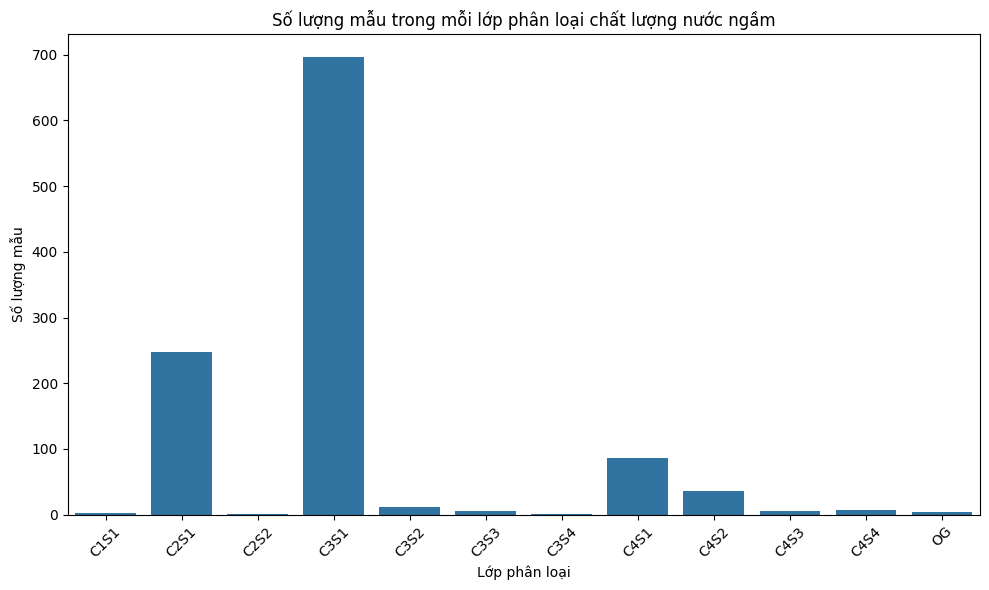

In [24]:
# đếm số lượng mẫu trong mỗi lớp
class_counts = df['Classification'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Số lượng mẫu trong mỗi lớp phân loại chất lượng nước ngầm')
plt.xlabel('Lớp phân loại')
plt.ylabel('Số lượng mẫu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kiểm tra các giá trị null của các trường dữ liệu.  
  
Ta thấy trường gwl có 11/1106 (~1%) bản ghi là null, đủ nhỏ để fill bằng mean_gwl.  
Còn với CO3 có 160/1106 (~15%) bản ghi là null, con số khá lớn, nhóm sẽ thử tìm cách khác.

In [4]:
df.isnull().sum()

gwl                11
pH                  0
E.C                 0
TDS                 0
CO3               160
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
RSC  meq  / L       0
dtype: int64

Hơn nữa ta còn phát hiện rằng 160 giá trị CO3 null này đều nằm ở năm 2019 (df_19).

In [5]:
df_19.drop(
    columns=[
        'sno', 
        'district', 
        'mandal', 
        'village', 
        'lat_gis', 
        'long_gis', 
        'season', 
        'Classification.1']) \
.isnull().sum()

gwl                 5
pH                  0
E.C                 0
TDS                 0
CO3               160
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
RSC  meq  / L       0
dtype: int64

Cell dưới tính toán các giá trị thông kê và vẽ phân phối của 2 trường TDS và E.C, lí do được giải thích tại cell tiếp theo

E.C - min: 205, max: 9499, mean: 1362.23869801085, std: 861.0611389751281
TDS - min: 131.2, max: 6079.36, mean: 871.8327667269439, std: 551.079128944082


Text(0.5, 1.0, 'TDS Distribution')

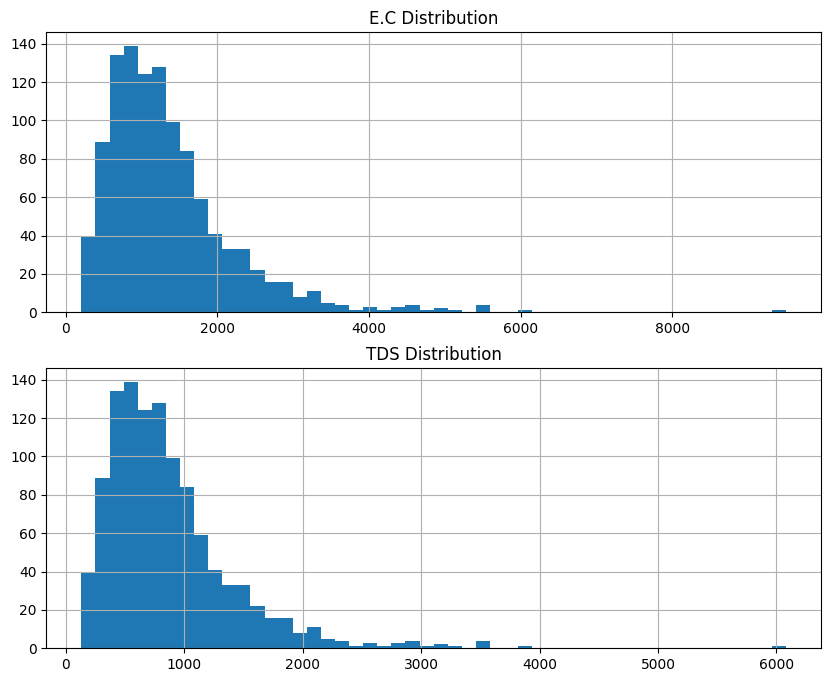

In [6]:
print(f"E.C - min: {df['E.C'].min()}, max: {df['E.C'].max()}, mean: {df['E.C'].mean()}, std: {df['E.C'].std()}")
print(f"TDS - min: {df['TDS'].min()}, max: {df['TDS'].max()}, mean: {df['TDS'].mean()}, std: {df['TDS'].std()}")

plt.subplots(2, 1, figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(data=df['E.C'].hist(bins=50))
plt.title('E.C Distribution')

plt.subplot(2, 1, 2)
plt.plot(data=df['TDS'].hist(bins=50))
plt.title('TDS Distribution')

<span style="color: gold;">Để fill CO3, trước tiên thử nghiệm bằng việc xây dựng mô hình tuyến tính đơn biến.  
Trước hết, xem ma trận tương quan giữa các biến.  </span>
  
Nhân tiện, ở bước này cũng phát hiện 2 trường là TDS và E.C có tương quan là 1.00, điều này dẫn đến quyết định loại bỏ trường E.C trong quy trình tiền xử lí cuối.  
- Loại bỏ đi 1 trong 2 biến có tương quan là 1 ngoài việc để giảm độ phức tạp tính toán, còn tránh được các trường hợp suy biến khi triển khai các thuật toán về sau (GMM,...)
- Chọn bỏ E.C là vì phân phối cũng như các giá trị thống kê của E.C đều lớn hơn TDS (gấp gần 1.5 lần), xóa trường E.C đi sẽ giúp các mô hình triển khai trong tương lai tính toán ổn định hơn. (Các kết quả của ý này được tính toán trong cell phía trên)

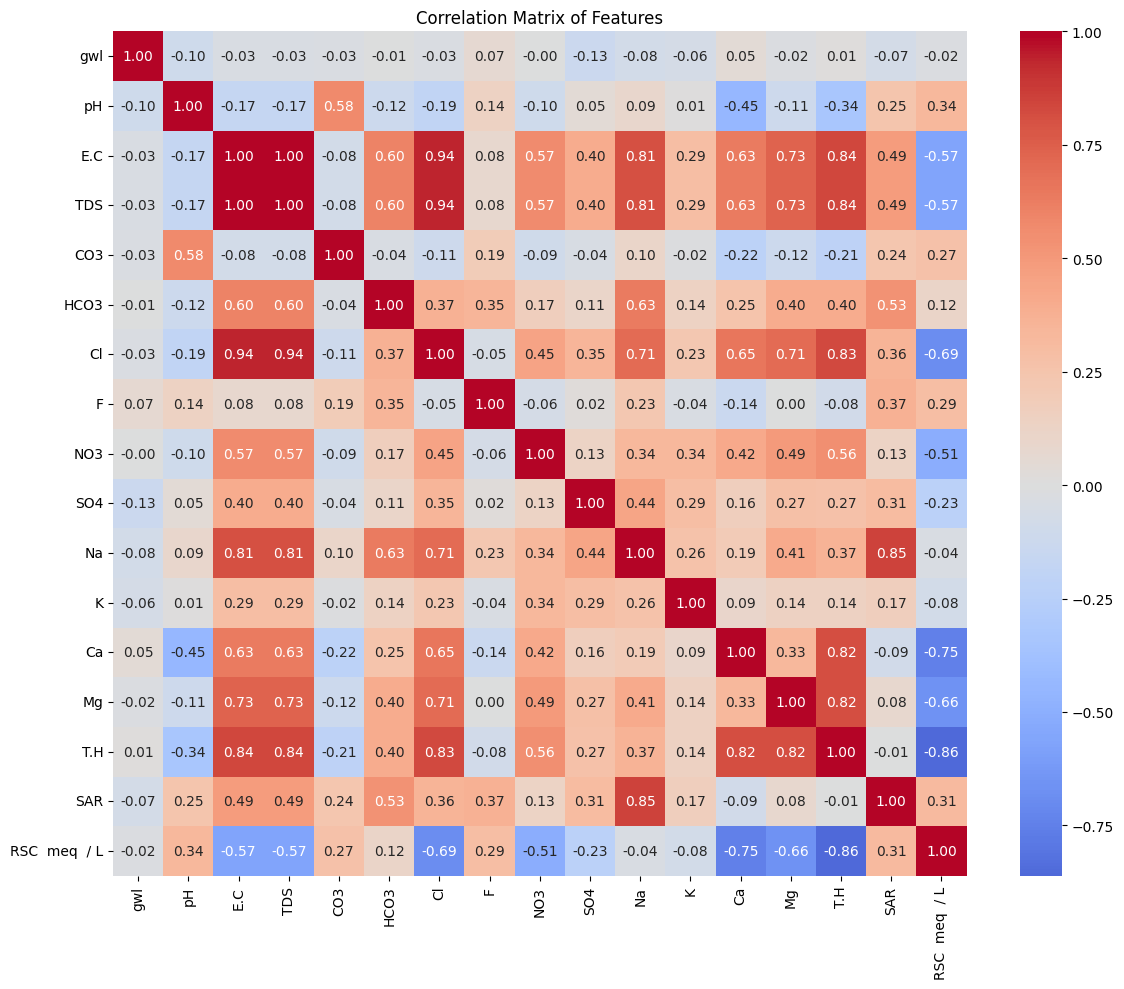

In [7]:
df.drop(['Classification'], axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(['Classification'], axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

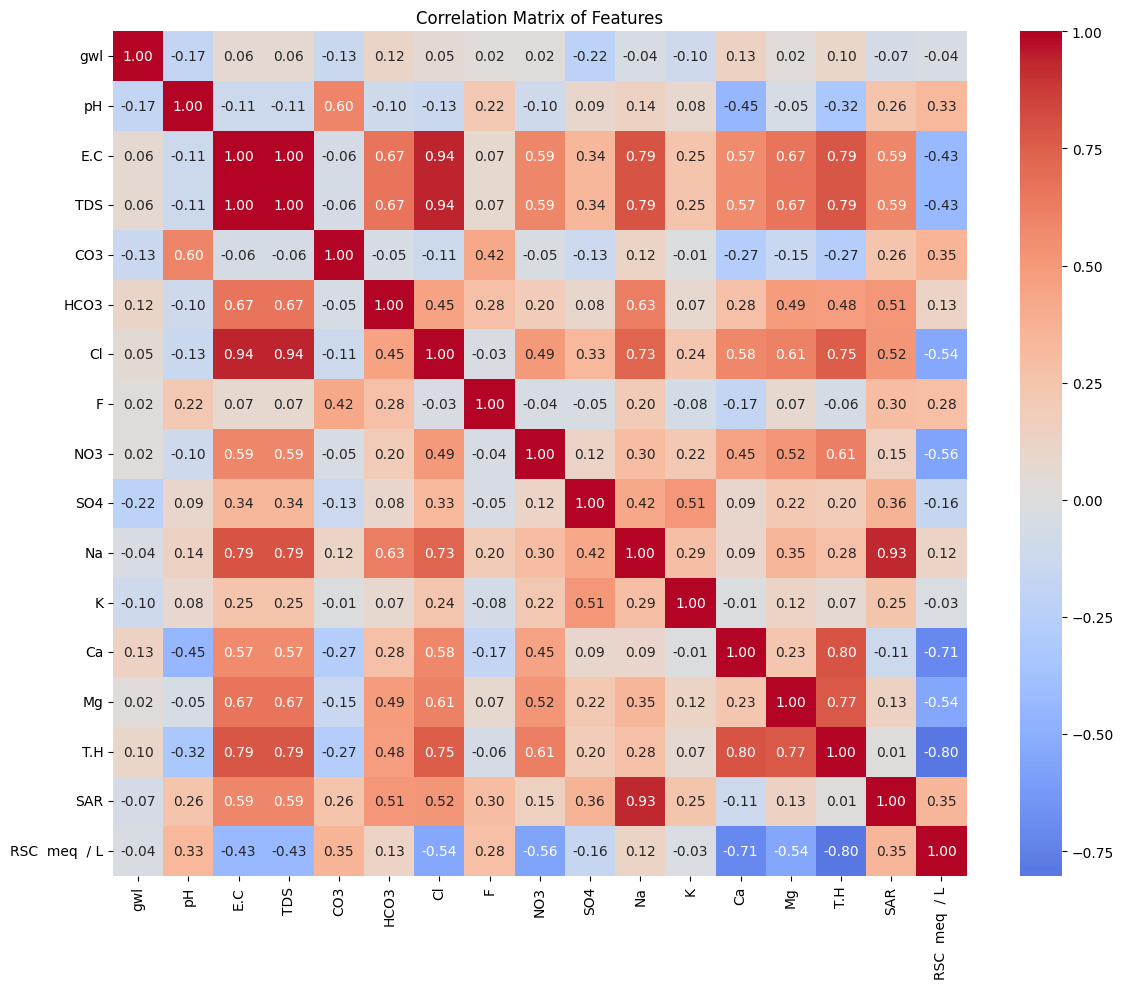

In [8]:
df_19 = df_19.drop(
    columns=[
        'sno', 
        'district', 
        'mandal', 
        'village', 
        'lat_gis', 
        'long_gis', 
        'season', 
        'Classification.1']).copy()

plt.figure(figsize=(12, 10))
sns.heatmap(df_19.drop(['Classification'], axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

<span style="color: gold;">Ta thấy rằng biến pH là biến có tương quan cao nhất với CO3</span>

Nhận xét thêm: tương quan của CO3 với pH ở df_19 (năm 2019) cao hơn ở df (toàn bộ). Bên cạnh đó, như vừa kiểm chứng ở trên thì toàn bộ giá trị CO3 null đều nằm ở df_19.  
  
Như vậy ta sẽ có 2 hướng huấn luyện mô hình hồi quy tuyến tính: trên bộ df và trên bộ df_19 (trong đó bộ df_19 có kì vọng ra kết quả tốt hơn mặc dù ít dữ liệu hơn)

In [9]:
print(f"df_19 length: {len(df_19)}, CO3 missing values: {int(df_19['CO3'].isnull().sum())}")
print(f"Vậy ta có {len(df_19) - int(df_19['CO3'].isnull().sum())} giá trị trong df_19 để train mô hình.")

df_19 length: 364, CO3 missing values: 160
Vậy ta có 204 giá trị trong df_19 để train mô hình.


Thử với df trước  
(Note: sử dụng log-transform để tránh predict giá trị âm)

Mean Squared Error: 251.6974915633542
R^2 Score: 0.1289992862886229


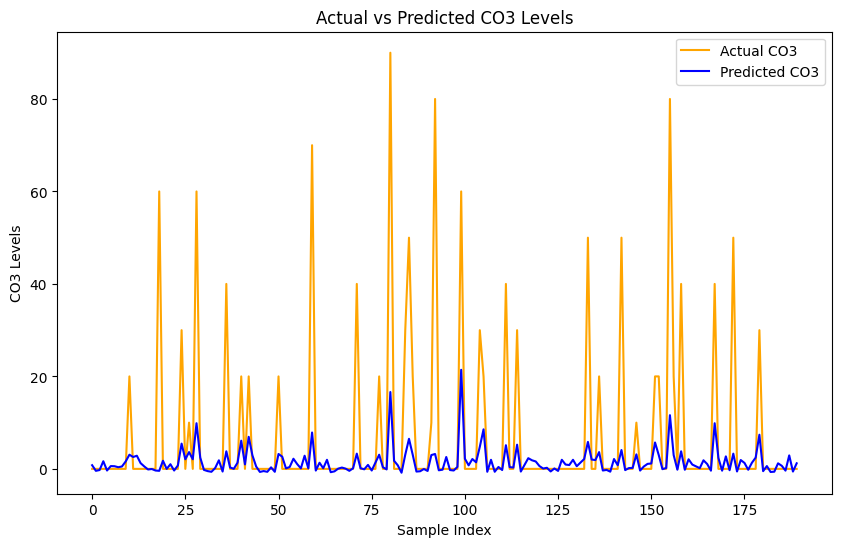

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ph = df.loc[df[df['CO3'].notnull()].index.tolist()]['pH']
co3 = df.loc[df[df['CO3'].notnull()].index.tolist()]['CO3']

ph_train, ph_test, co3_train, co3_test = train_test_split(
    ph, 
    co3, 
    test_size=0.2, 
    random_state=42)

co3_train_log = np.log1p(co3_train)

lm = LinearRegression()
lm.fit(ph_train.values.reshape(-1, 1), co3_train_log.values.reshape(-1, 1))
co3_pred = lm.predict(ph_test.values.reshape(-1, 1))
co3_pred = np.expm1(co3_pred)
mse = mean_squared_error(co3_test, co3_pred)
r2 = r2_score(co3_test, co3_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plt.figure(figsize=(10, 6))
plt.plot(co3_test.values, label='Actual CO3', color='orange')
plt.plot(co3_pred, label='Predicted CO3', color='blue')
plt.title('Actual vs Predicted CO3 Levels')
plt.xlabel('Sample Index')
plt.ylabel('CO3 Levels')
plt.legend()
plt.show()

Mean Squared Error: 201.8158004220307
R^2 Score: 0.2615316488693217


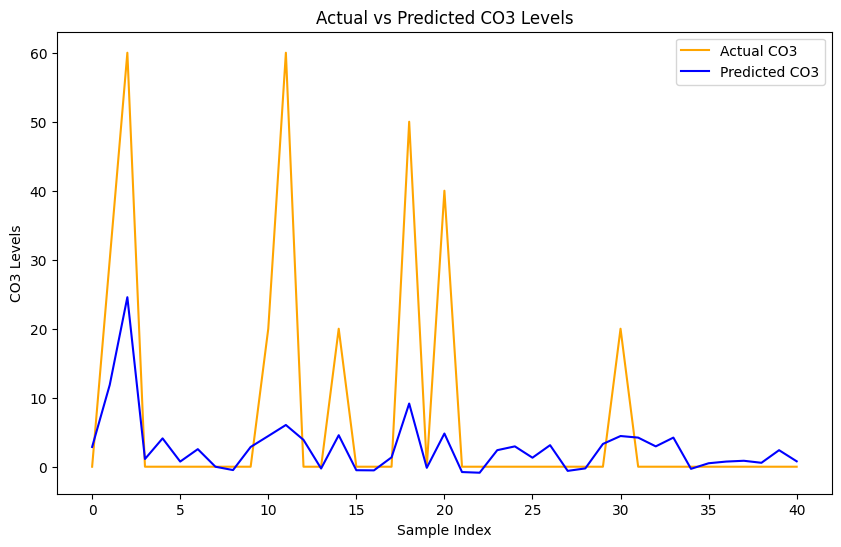

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ph_19 = df_19.loc[df_19[df_19['CO3'].notnull()].index.tolist()]['pH']
co3_19 = df_19.loc[df_19[df_19['CO3'].notnull()].index.tolist()]['CO3']

ph_train_19, ph_test_19, co3_train_19, co3_test_19 = train_test_split(
    ph_19, 
    co3_19, 
    test_size=0.2, 
    random_state=42)

co3_train_19_log = np.log1p(co3_train_19)

lm = LinearRegression()
lm.fit(ph_train_19.values.reshape(-1, 1), co3_train_19_log.values.reshape(-1, 1))
co3_pred_19_log = lm.predict(ph_test_19.values.reshape(-1, 1))
co3_pred_19 = np.expm1(co3_pred_19_log)
mse_19 = mean_squared_error(co3_test_19, co3_pred_19)
r2_19 = r2_score(co3_test_19, co3_pred_19)

print(f"Mean Squared Error: {mse_19}")
print(f"R^2 Score: {r2_19}")

plt.figure(figsize=(10, 6))
plt.plot(co3_test_19.values, label='Actual CO3', color='orange')
plt.plot(co3_pred_19, label='Predicted CO3', color='blue')
plt.title('Actual vs Predicted CO3 Levels')
plt.xlabel('Sample Index')
plt.ylabel('CO3 Levels')
plt.legend()
plt.show()

<span style="color: gold;">Ta thấy, cả 2 hướng đều cho ra kết quả rất tệ, ta có thể kết luận mô hình hồi quy đơn biến pH không đưa ra kết quả dự đoán tốt cho CO3, từ đó không thể fill CO3 null bằng cách này.  </span>
  
Giải thích cho điều này, là do thực tế CO3 có rất nhiều giá trị bằng 0, số ít các giá trị còn lại thì lại lớn hơn hẳn (10,20,30,...90,..) trong khi các giá trị pH lại rất tập trung (phương sai = 0.2088) từ đó dẫn đến corr cao (~0.6) nhưng thực tế gần như không thế cho ra dự đoán tiệm cận tốt tại các giá trị 10,20,30,...90,..  
  
(Dẫn chứng cho kết luận trên ở 2 cell dưới)

Phương sai của pH: 0.20883299125297639, độ lệch chuẩn của pH: 0.45698248462383806


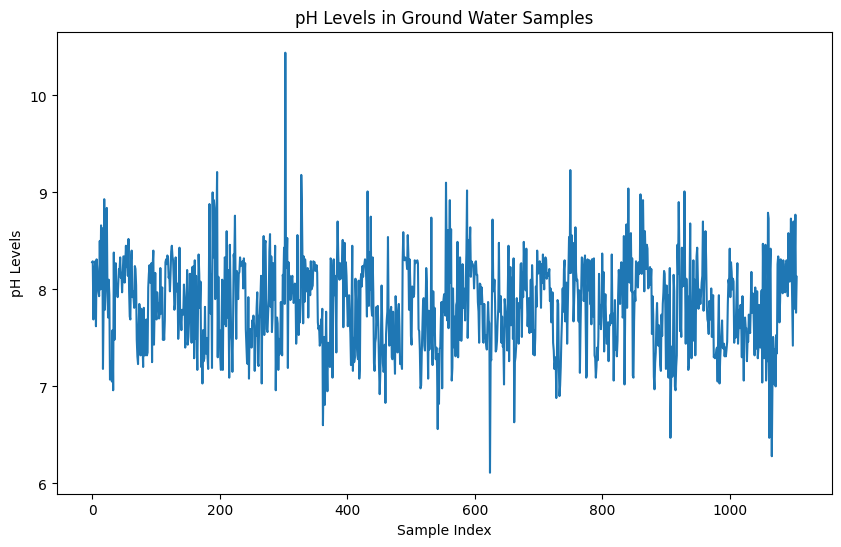

In [12]:
print(f"Phương sai của pH: {df['pH'].var()}, độ lệch chuẩn của pH: {df['pH'].std()}")

plt.figure(figsize=(10, 6))
plt.plot(df['pH'])
plt.title('pH Levels in Ground Water Samples')
plt.xlabel('Sample Index')
plt.ylabel('pH Levels')
plt.show()

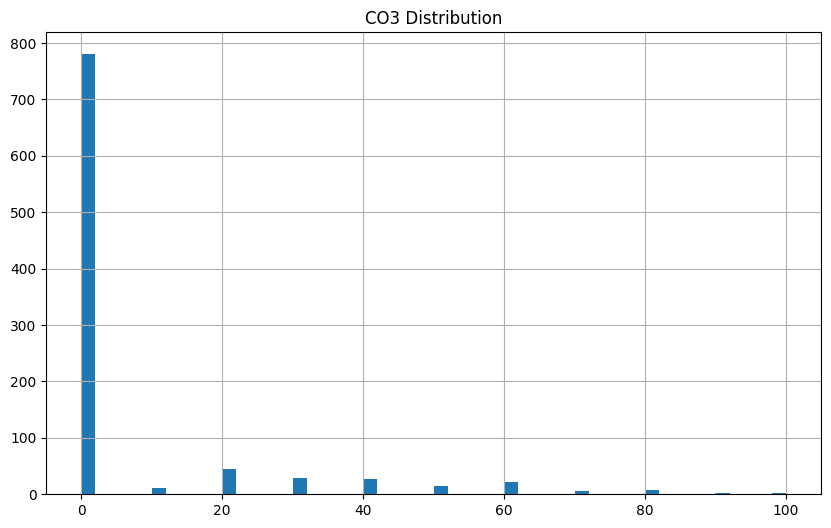

In [13]:
df.CO3.hist(bins=50, figsize=(10, 6))
plt.title('CO3 Distribution')
plt.show()

Ta tiến tới 1 cách tiếp cận khác, dựa trên [tài liệu của data trên kaggle](https://www.kaggle.com/datasets/sivapriyagarladinne/telangana-post-monsoon-ground-water-quality-data), ta biết được rằng RSC = ((CO3 2-) + (HCO3-)) - ((Ca2+)+(Mg2+)), tức có một mối quan hệ giữa các biến RSC, HCO3, Ca, Mg và CO3.  

<span style="color: gold;">Vì thế em thử nghiệm huấn luyện mô hình hồi quy đa biến với các biến RSC, HCO3, Ca, Mg với kì vọng mô hình dự đoán tốt giá trị CO3.</span> 
  
(Note: sử dụng log-transform và Standard Scaler)

Mean Squared Error: 2891.461826376472
R^2 Score: -9.00592138920539


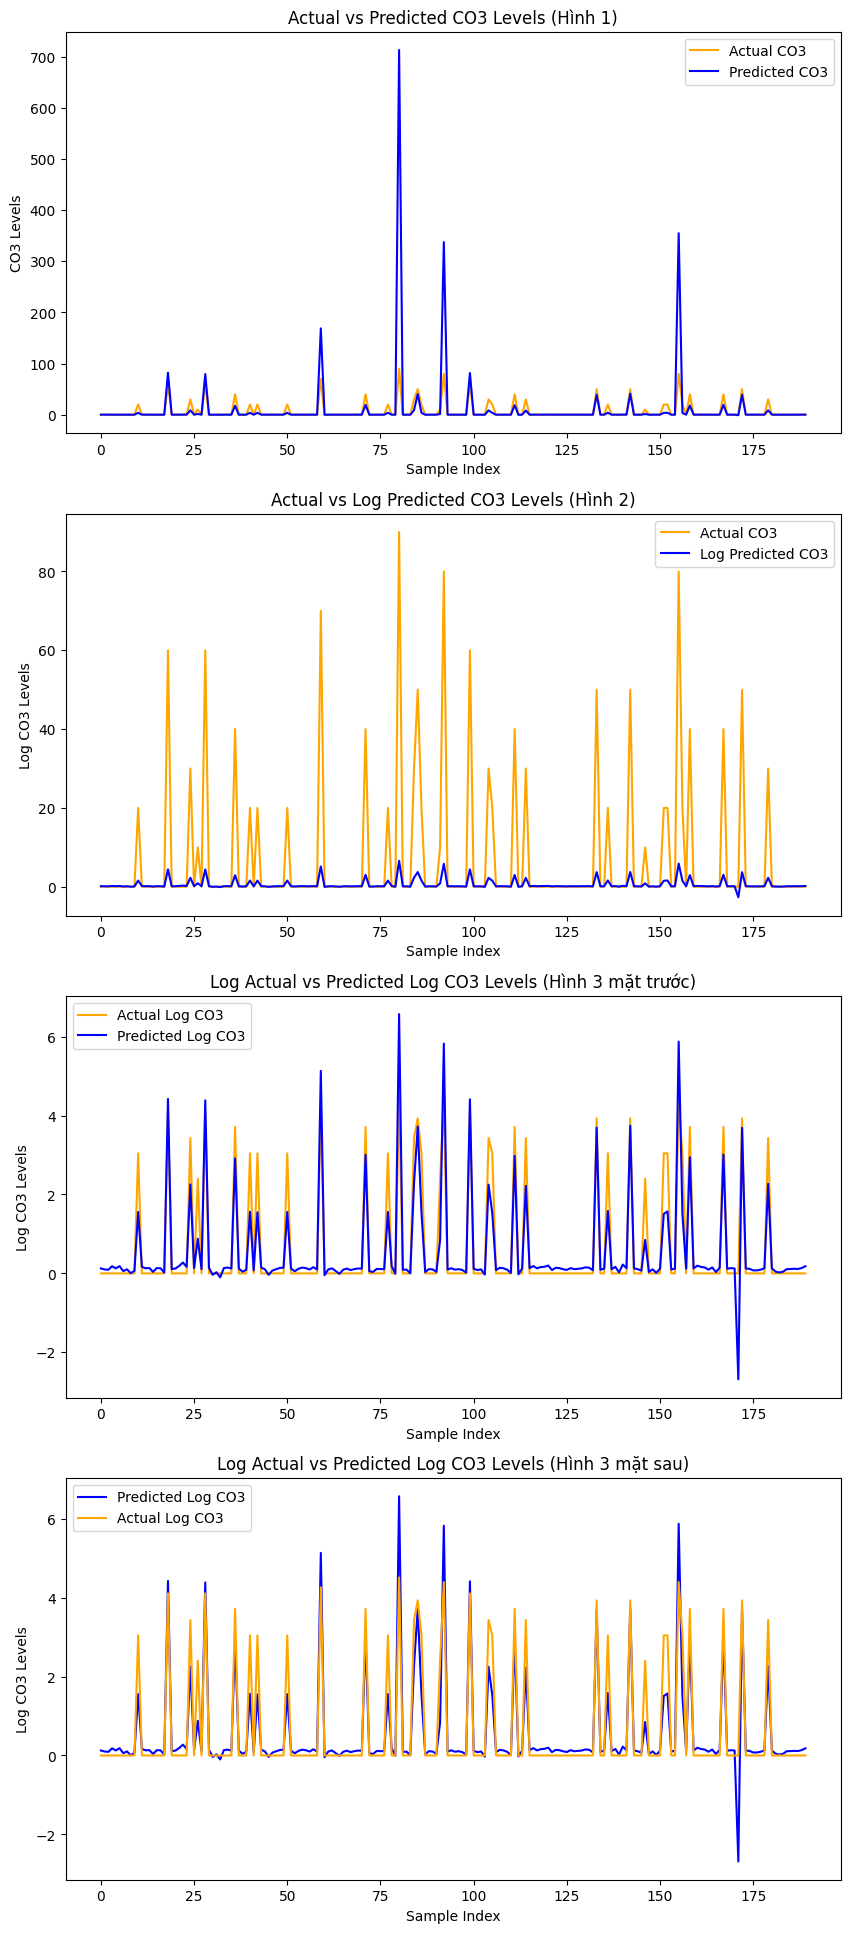

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = df.loc[df[df['CO3'].notnull()].index.tolist()][['RSC  meq  / L', 'HCO3', 'Ca', 'Mg']]
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
co3 = df.loc[df[df['CO3'].notnull()].index.tolist()]['CO3']

X_train, X_test, co3_train, co3_test = train_test_split(
    X, 
    co3, 
    test_size=0.2, 
    random_state=42)

co3_train_log = np.log1p(co3_train)

lm = LinearRegression()
lm.fit(X_train.values, co3_train_log.values)
co3_pred_log = lm.predict(X_test.values)
co3_pred = np.expm1(co3_pred_log)
mse = mean_squared_error(co3_test, co3_pred)
r2 = r2_score(co3_test, co3_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plt.subplots(4, 1, figsize=(10, 24))

plt.subplot(4, 1, 1)
plt.plot(co3_test.values, label='Actual CO3', color='orange')
plt.plot(co3_pred, label='Predicted CO3', color='blue')
plt.title('Actual vs Predicted CO3 Levels (Hình 1)')
plt.xlabel('Sample Index')
plt.ylabel('CO3 Levels')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(co3_test.values, label='Actual CO3', color='orange')
plt.plot(co3_pred_log, label='Log Predicted CO3', color='blue')
plt.title('Actual vs Log Predicted CO3 Levels (Hình 2)')
plt.xlabel('Sample Index')
plt.ylabel('Log CO3 Levels')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(np.log1p(co3_test).values, label='Actual Log CO3', color='orange')
plt.plot(co3_pred_log, label='Predicted Log CO3', color='blue')
plt.title('Log Actual vs Predicted Log CO3 Levels (Hình 3 mặt trước)')
plt.xlabel('Sample Index')
plt.ylabel('Log CO3 Levels')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(co3_pred_log, label='Predicted Log CO3', color='blue')
plt.plot(np.log1p(co3_test).values, label='Actual Log CO3', color='orange')
plt.title('Log Actual vs Predicted Log CO3 Levels (Hình 3 mặt sau)')
plt.xlabel('Sample Index')
plt.ylabel('Log CO3 Levels')
plt.legend()

plt.show()

Ta thấy rằng kết quả rất tệ (MSE = 2891.46182), MSE lớn vậy là do nó là bình phương sai số, mà sai số lớn chủ yếu ở các giá trị lớn (10,20,30,...90,..) còn các giá trị 0 được dự đoán khá sát. Tuy nhiên chính các giá trị lớn mới là thứ cần quan tâm bởi vì nó có giá trị trong các bài toán phân loại/phân cụm sau này hơn là các giá trị 0.  
- Hình 1 cho thấy sai số tập trung ở các giá trị Actual CO3 lớn hơn 0
- Hình 2 so sánh predict CO3 trong log-space với Actual CO3 là một minh chứng quan trọng cho thấy rằng mô hình hiểu được cấu trúc của trường CO3 (ta thấy sự tương đồng rất hợp lí giữa 2 đồ thị này), từ đó ta biết được rằng sai số MSE cao chủ yếu là do sự nhạy cảm của giai đoạn chuyển từ log-space về không gian thực (sử dụng e mũ các kết quả dự đoán từ log-space).
- Hình 3 so sánh predict và actual cùng trong không gian log-space, chỉ 1 sai khác nhỏ ở đây cũng đẫn đến sai khác rất lớn sau khi e mũ (chuyển về không gian thực).

Với kết quả trên, ta tiếp tục thử nghiệm huấn luyện 1 mô hình phần dư để dự đoán lần 2 cho các giá trị vừa được mô hình ban đầu predict ra.

Mean Squared Error (for CO3_pred_log > 0.5): 0.026967265944619106
R^2 Score (for CO3_pred_log > 0.5): 0.9160186383450136


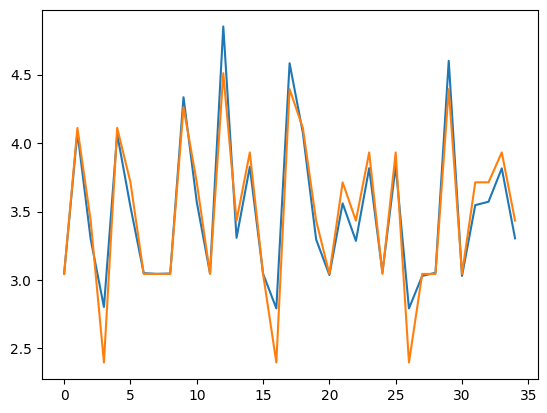

In [15]:
# Fit mô hình sai khác cho các giắ trị CO3_pred_log > 0.5
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lm_diff = LinearRegression()
lm_diff.fit(np.array(co3_pred_log[co3_pred_log > 0.5]).reshape(-1, 1), np.log1p(co3_test[co3_pred_log > 0.5]).values.reshape(-1, 1))
lm_diff.predict(np.array(co3_pred_log[co3_pred_log > 0.5]).reshape(-1, 1))

mse_diff = mean_squared_error(np.log1p(co3_test[co3_pred_log > 0.5]), lm_diff.predict(np.array(co3_pred_log[co3_pred_log > 0.5]).reshape(-1, 1)))
r2_diff = r2_score(np.log1p(co3_test[co3_pred_log > 0.5]), lm_diff.predict(np.array(co3_pred_log[co3_pred_log > 0.5]).reshape(-1, 1)))
print(f"Mean Squared Error (for CO3_pred_log > 0.5): {mse_diff}")
print(f"R^2 Score (for CO3_pred_log > 0.5): {r2_diff}")

plt.plot(lm_diff.predict(np.array(co3_pred_log[co3_pred_log > 0.5]).reshape(-1, 1)))
plt.plot(np.log1p(co3_test[co3_pred_log > 0.5]).values)
plt.show()

Kết quả tốt, thử triển khai.

Mean Squared Error: 13.134273511458847
R^2 Score: 0.9545487659352315


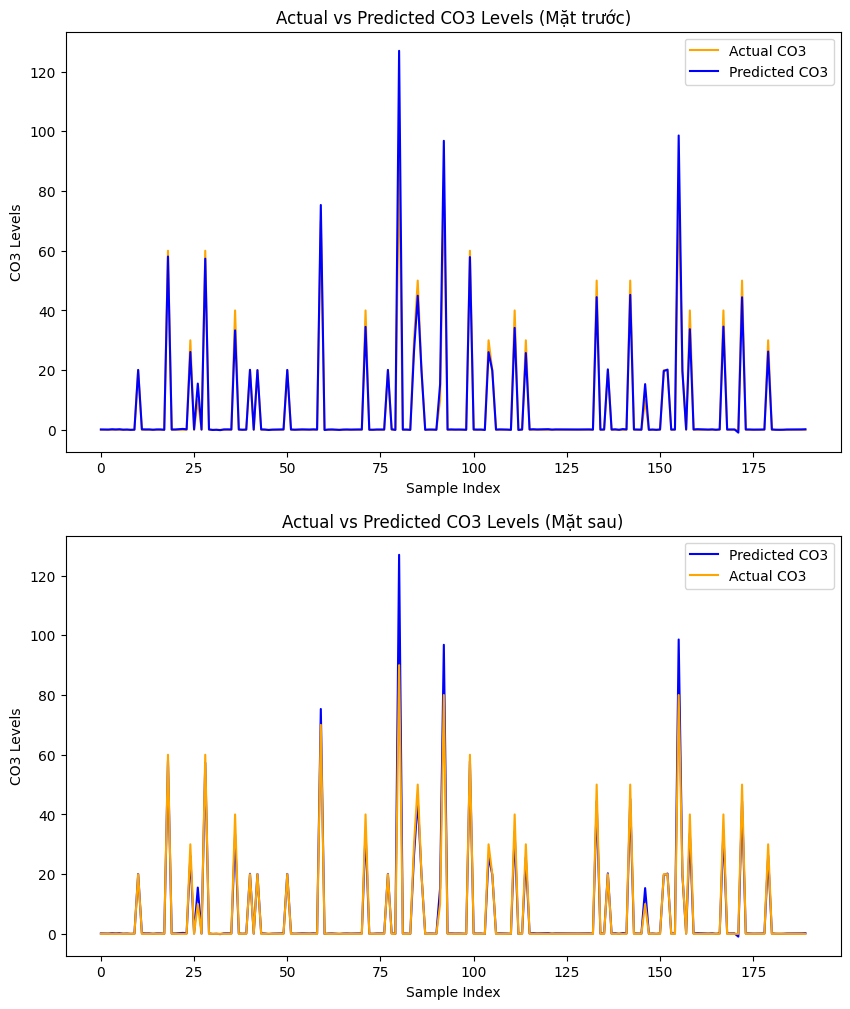

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = df.loc[df[df['CO3'].notnull()].index.tolist()][['RSC  meq  / L', 'HCO3', 'Ca', 'Mg']]
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
co3 = df.loc[df[df['CO3'].notnull()].index.tolist()]['CO3']

X_train, X_test, co3_train, co3_test = train_test_split(
    X, 
    co3, 
    test_size=0.2, 
    random_state=42)

co3_train_log = np.log1p(co3_train)

lm = LinearRegression()
lm.fit(X_train.values, co3_train_log.values)
co3_pred_log = lm.predict(X_test.values)
co3_pred_log[co3_pred_log > 0.5] = lm_diff.predict(np.array(co3_pred_log[co3_pred_log > 0.5]).reshape(-1, 1)).flatten()
co3_pred = np.expm1(co3_pred_log)
mse = mean_squared_error(co3_test, co3_pred)
r2 = r2_score(co3_test, co3_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plt.subplots(2, 1, figsize=(10, 12))

plt.subplot(2, 1, 1)
plt.plot(co3_test.values, label='Actual CO3', color='orange')
plt.plot(co3_pred, label='Predicted CO3', color='blue')
plt.title('Actual vs Predicted CO3 Levels (Mặt trước)')
plt.xlabel('Sample Index')
plt.ylabel('CO3 Levels')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(co3_pred, label='Predicted CO3', color='blue')
plt.plot(co3_test.values, label='Actual CO3', color='orange')
plt.title('Actual vs Predicted CO3 Levels (Mặt sau)')
plt.xlabel('Sample Index')
plt.ylabel('CO3 Levels')
plt.legend()

plt.show()

In [17]:
# Sai số trung bình của giá trị lớn
co3_pred_greater_0_5 = co3_pred[co3_pred > 5]
mean_error_greater_0_5 = np.mean(np.abs(co3_test[co3_pred > 5] - co3_pred_greater_0_5))
print(f"Mean Absolute Error for predictions where CO3_pred > 5: {mean_error_greater_0_5}")

Mean Absolute Error for predictions where CO3_pred > 5: 4.928294574914811


Ta có thể thấy kết quả cải thiện rõ rệt MSE = 13.13427 (tốt hơn khoảng 220 lần), R² = 0.95454.  
  
Lúc này thì giá trị cần quan tâm là trung bình sai số tính riêng các dự đoán cho giá trị lớn, bằng 4.92829. 
(Note: giá trị lớn hơn 0 (là 10,20,30,...,90,) là các giá trị quyết định sự đóng gớp của trường CO3 trong các bài toán phân loại/phân cụm sau này do phần lớn CO3 đều có giá trị = 0) 

Hay nói cách khác nếu ta triển khai mô hình hiện tại để fill các giá trị CO3 null, sai số tuyệt đối cho các giá trị > 0 sẽ có sai số trung bình ~ 4.92829.

<span style="color: gold;">Đây là 1 sai số chưa đủ tốt, ta cân nhắc đến việc loại bỏ trường này khỏi dữ liệu.</span> 
  
Như đã biết, có đến 780/1106 (~70.52%) giá trị CO3 là 0. Ngoài 160 giá trị null, ta còn lại 166 giá trị > 0, đây là các giá trị thực sự ảnh hưởng đến kết quả phân loại/phân cụm về sau.

In [18]:
int(df[df['CO3'] == 0]['CO3'].count()), int(df['CO3'].count()), len(df)

(780, 946, 1106)

<Axes: >

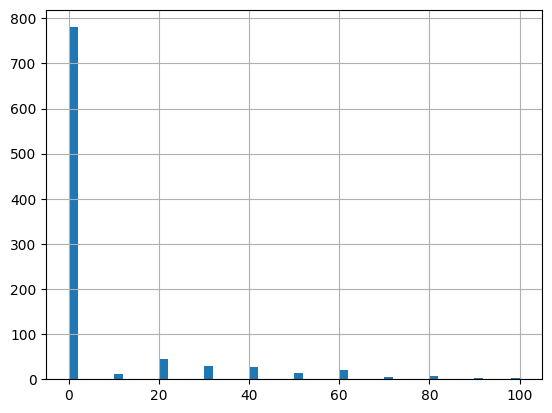

In [19]:
df.CO3.hist(bins=50)

<span style="color: gold;">Kiểm tra thử sự phân bố về số lượng </span> của các giá trị CO3 > 0 vào các class, nhận thấy phân bố rải đều vào các class -> không đặc biệt hỗ trợ phân loại.  
(Note: nếu phần lớn các giá trị này tập hợp vào 1 hoặc 1 nhóm các class thì nó sẽ đóng góp lớn cho mô hình phân loại)

In [20]:
pd.concat([
    df[df['CO3'] > 0.0]['Classification'].value_counts(),
    df.groupby('Classification').size(),
    (df[df['CO3'] > 0.0]['Classification'].value_counts() / df.groupby('Classification').size()) * 100]
    , axis = 1)  

,count,0,1
Classification,,,
C3S1,83,696,11.925287
C2S1,54,248,21.774194
C4S4,6,7,85.714286
C4S2,5,36,13.888889
C4S1,5,87,5.747126
C3S2,4,12,33.333333
C3S3,4,6,66.666667
C1S1,1,3,33.333333
C3S4,1,1,100.000000


<span style="color: gold;">Kiểm tra thử sự phân bố về giá trị </span> của các giá trị CO3 > 0 vào các class chính (nhóm 4 class nhiều nhất).  
Nhận thấy các giá trị mean này không đủ xa so với std, tức khoảng giá trị CO3 của các class chồng đè lên nhau -> không đặc biệt hỗ trợ phân loại.  
(Note: nếu các khoản giá trị này tách rời nhau, nó sẽ đóng góp lớn cho mô hình phân loại)

In [21]:
print(f"C2S1:: Mean CO3: {df[(df['CO3'] > 0.0) & (df['Classification'] == 'C2S1')]['CO3'].mean()}, Std CO3: {df[(df['CO3'] > 0.0) & (df['Classification'] == 'C2S1')]['CO3'].std()}")
print(f"C3S1:: Mean CO3: {df[(df['CO3'] > 0.0) & (df['Classification'] == 'C3S1')]['CO3'].mean()}, Std CO3: {df[(df['CO3'] > 0.0) & (df['Classification'] == 'C3S1')]['CO3'].std()}")
print(f"C4S2:: Mean CO3: {df[(df['CO3'] > 0.0) & (df['Classification'] == 'C4S2')]['CO3'].mean()}, Std CO3: {df[(df['CO3'] > 0.0) & (df['Classification'] == 'C4S2')]['CO3'].std()}")
print(f"C4S1:: Mean CO3: {df[(df['CO3'] > 0.0) & (df['Classification'] == 'C4S1')]['CO3'].mean()}, Std CO3: {df[(df['CO3'] > 0.0) & (df['Classification'] == 'C4S1')]['CO3'].std()}")

C2S1:: Mean CO3: 36.371, Std CO3: 17.922491688926026
C3S1:: Mean CO3: 40.72289156626506, Std CO3: 23.87891878349157
C4S2:: Mean CO3: 32.0, Std CO3: 17.88854381999832
C4S1:: Mean CO3: 50.0, Std CO3: 27.386127875258307


<span style="color: gold;">Dựa trên tất cả phân tích trên, theo đánh giá chủ quan, việc bỏ trường CO3 sẽ ít rủi ro hơn việc fill bằng mô hình, em quyết định loại bỏ trường CO3 khỏi bộ dữ liệu.</span> 
   
<span style="color: #90EE90;">Như vậy, ta sẽ có 14 biến giải thích, 1 biến label và tổng cộng 1106 bản ghi.</span> 